<a href="https://colab.research.google.com/github/nahor8011/Customer-Churn-Prediction/blob/main/C_continous_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm # for Q-Q Plot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style = "white")

In [ ]:
data = pd.read_csv("churn_prediction.csv")
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [ ]:
data.shape

(28382, 21)

In [ ]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [ ]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [ ]:
# AGE OF CUSTOMERS

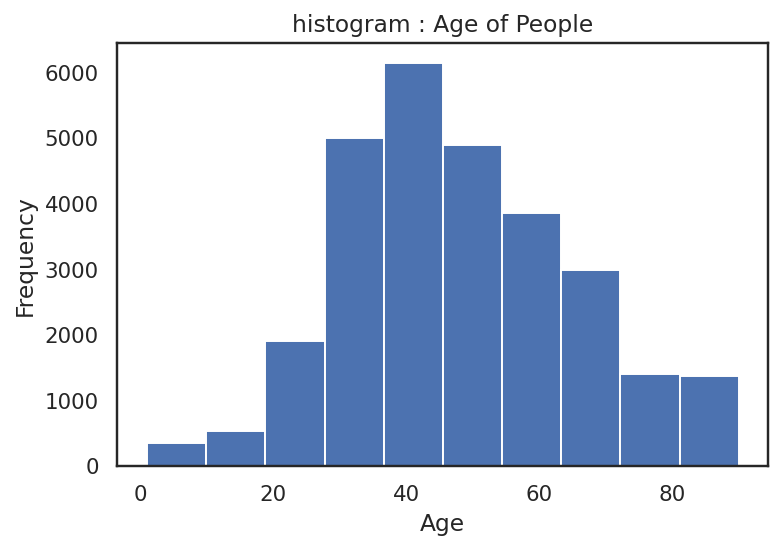

In [ ]:
# plotting histograms

plt.figure(dpi = 140)
plt.hist(data["age"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("histogram : Age of People")
plt.show()

In [ ]:
# Calculating points of standard deviation

age = data["age"]
a_mean = age.mean()
a_median = age.median()
a_std = age.std()
a_stdev = a_mean-a_std,  a_mean+a_std

a_mean, a_median, a_std, a_stdev

(48.208336269466564,
 46.0,
 17.807163372966425,
 (30.40117289650014, 66.01549964243299))

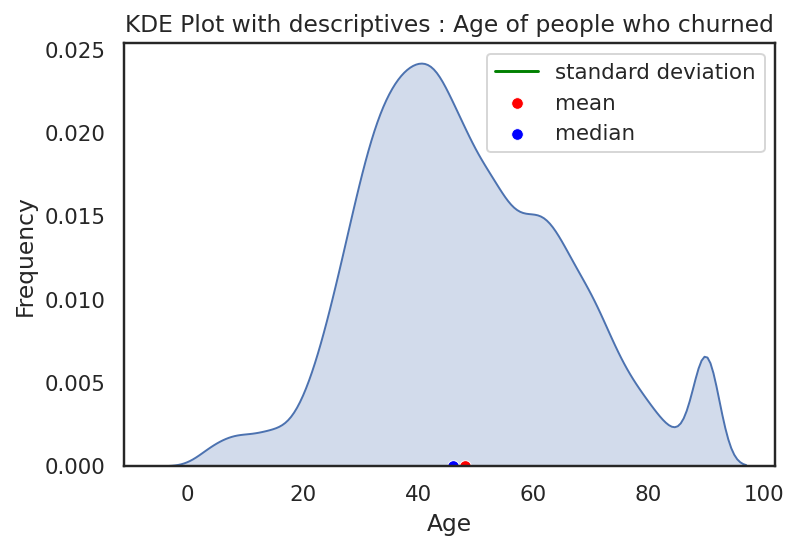

In [ ]:
# Plotting KDE Plots with descriptives

plt.figure(dpi = 140)
sns.kdeplot(age, shade = True)
sns.scatterplot(x = [a_mean], y = [0], color = 'red', label = 'mean' )
sns.scatterplot(x = [a_median], y = [0], color = 'blue', label = 'median')
sns.lineplot(x = a_stdev, y = [0,0], color = 'green', label = 'standard deviation')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("KDE Plot with descriptives : Age of people who churned")
plt.show()

In [ ]:
## Q-Q PLOT

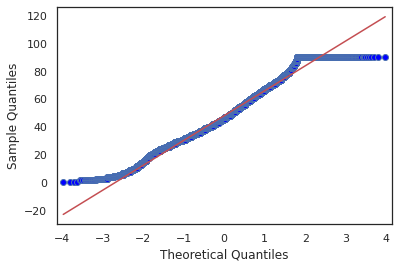

In [ ]:
sm.qqplot(age, line = 's')
plt.show()

In [ ]:
data['age'].skew()
# Normal Distribution

0.33058929557517264

In [ ]:
data['age'].kurtosis()

-0.16866785691275865

In [ ]:
# VINATGE --> Number of days since the customer has joined the bank

In [ ]:
v_mean = data['vintage'].mean()
v_median = data['vintage'].median()
v_mode = data['vintage'].mode()

# checking
print(v_mean)
print(v_median)
print(v_mode)

2091.1441054189277
2154.0
0    2251
1    2260
dtype: int64


In [ ]:
print(data[data["vintage"]==2251].shape[0])
print(data[data["vintage"]==2260].shape[0])

69
69


In [ ]:
# plotting histogram

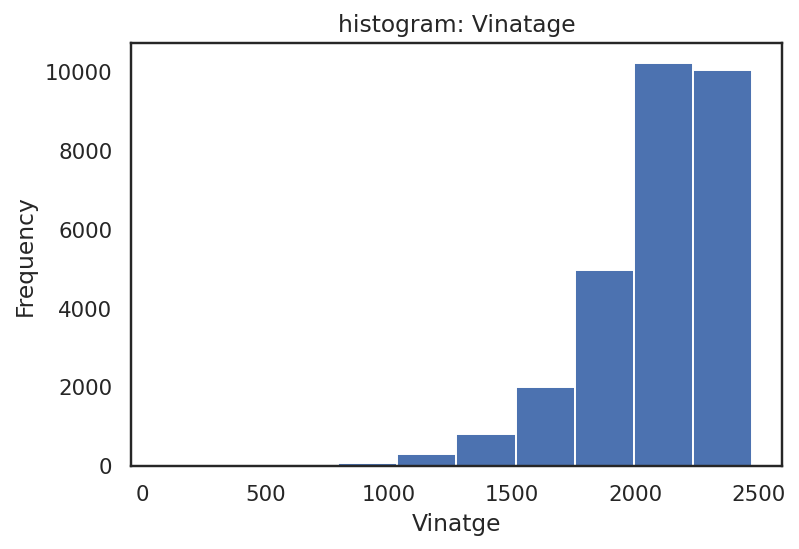

In [ ]:
plt.figure(dpi = 140)
plt.hist(data["vintage"])
plt.xlabel("Vinatge")
plt.ylabel("Frequency")
plt.title("histogram: Vinatage")
plt.show()

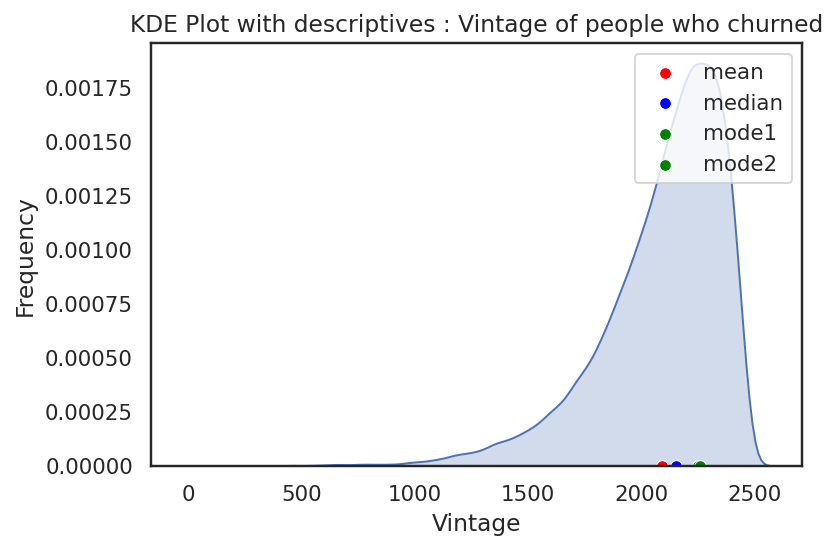

In [ ]:
# Plotting KDE Plots with descriptives

plt.figure(dpi = 140)
sns.kdeplot(data['vintage'], shade = True)
sns.scatterplot(x = [v_mean], y = [0], color = 'red', label = 'mean' )
sns.scatterplot(x = [v_median], y = [0], color = 'blue', label = 'median')
sns.scatterplot(x = [v_mode[0]], y = [0], color = 'green', label = 'mode1')
sns.scatterplot(x = [v_mode[1]], y = [0], color = 'green', label = 'mode2')
plt.xlabel("Vintage")
plt.ylabel("Frequency")
plt.title("KDE Plot with descriptives : Vintage of people who churned")
plt.legend()
plt.show()

In [ ]:
vin = data["vintage"]
vin.skew()

-1.3889357082821185

In [ ]:
vin.kurtosis()

2.7234245375227926

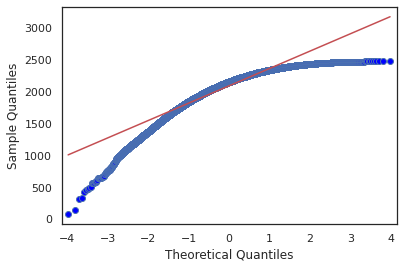

In [ ]:
sm.qqplot(vin, line = 's')
plt.show()